In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"

In [3]:
df = pd.read_csv(data)
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [4]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [5]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [6]:
df_num = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
df_cat = df.select_dtypes(exclude=['object']).columns.tolist()
df_cat

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [8]:
# Handling missing values

# for col in df.columns:
#     if df[col].dtype =='object' : #categorical features
#         df[col].fillna('NA', inplace=True)
#     else: # numerical features
#         df[col].fillna(0.0, inplace=True)

#### Handling Missing Values

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('NA')

In [10]:
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(0.0)

In [11]:
print(df.isnull().sum())

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


#### Question 1
What is the most frequent observation (mode) for the column industry?



In [12]:
print(f"The most frequent observation (mode) for the column industry :", df['industry'].mode())

The most frequent observation (mode) for the column industry : 0    retail
Name: industry, dtype: object


#### Question 2
What are the two features that have the biggest correlation?

In [13]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [14]:
corr = num_df.corr()
print(corr)

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   
converted                                 0.435914       0.053131   

                          interaction_count  lead_score  converted  
number_of_courses_viewed          -0.023565   -0.004879   0.435914  
annual_income                      0.027036    0.015610   0.053131  
interaction_count                  1.000000    0.009888   0.374573  
lead_score                         0.009888    1.000000   0.193673  
converted                          0.374573    0.193673   1.000000  


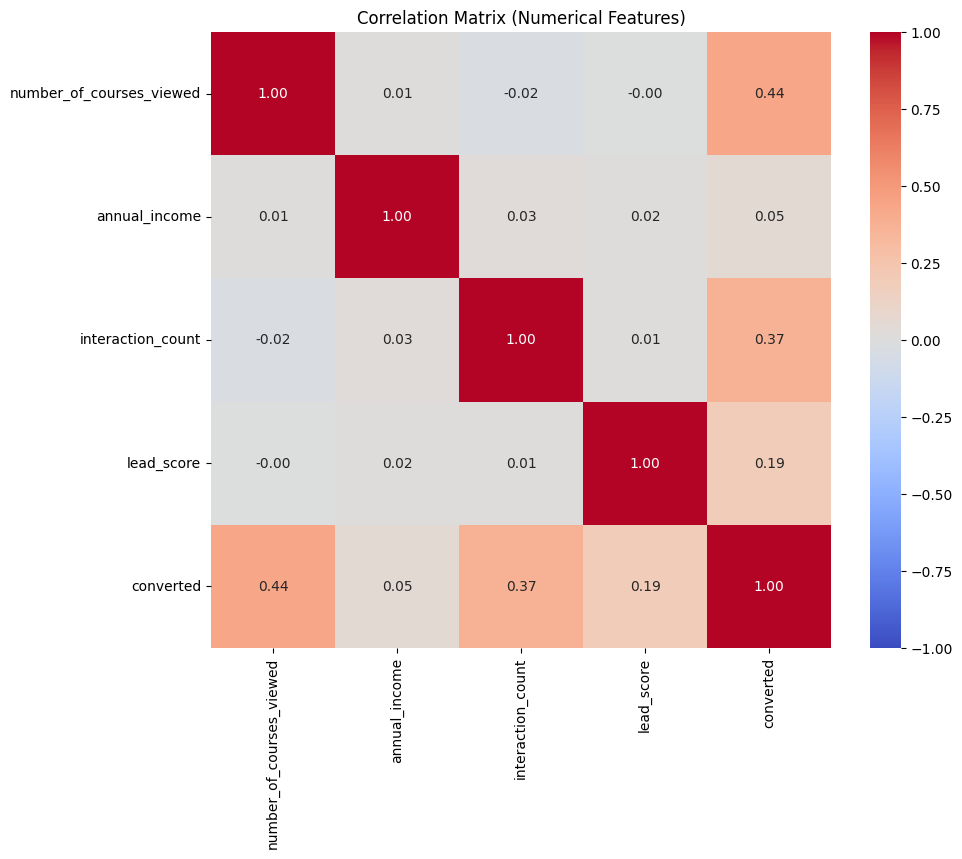

In [15]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

In [16]:
corr_pairs = corr.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]  # remove correlation of a variable with itself
top_pair = corr_pairs.sort_values(ascending=False).idxmax()
top_value = corr_pairs.max()

print("The two features with the highest correlation are:", top_pair)
print("The highest correlation value is:", top_value)

The two features with the highest correlation are: ('number_of_courses_viewed', 'converted')
The highest correlation value is: 0.43591365802117926


In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif

In [18]:
# Define the target column and remove it from the features
target = 'converted'
y = df[target]
X = df.drop(columns=[target])

# First split: Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Second split: Temp → Validation (50%) and Test (50%) of the remaining 40%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Print sizes to confirm the splits
print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 877
Validation set size: 292
Test set size: 293


#### Question 3 Biggesr MI

In [19]:
#Select only categorical columns from training data
cat_cols = X_train.select_dtypes(include=['object']).columns
X_train_cat = X_train[cat_cols].copy()

In [20]:
#Fill missing values
X_train_cat = X_train_cat.fillna('NA')

In [21]:
#Encode categorical variables using ordinal encoding
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train_cat)

In [22]:
mi_scores = mutual_info_classif(X_train_encoded, y_train, discrete_features=True, random_state=42)

In [23]:
#Compute mutual information scores
mi_scores = mutual_info_classif(X_train_encoded, y_train, discrete_features=True, random_state=42)

# Map scores to column names and round
mi_series = pd.Series(mi_scores, index=cat_cols).sort_values(ascending=False).round(2)

# Output the results
print("Mutual Information Scores (rounded):")
print(mi_series)

# Find feature with highest MI score
top_feature = mi_series.idxmax()
top_score = mi_series.max()

print(f"\nThe categorical variable with the highest mutual information score is: '{top_feature}' ({top_score})")

Mutual Information Scores (rounded):
lead_source          0.03
employment_status    0.02
industry             0.02
location             0.00
dtype: float64

The categorical variable with the highest mutual information score is: 'lead_source' (0.03)


In [24]:
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Align validation set to training columns (add missing cols)
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Train logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_val_encoded)
accuracy = accuracy_score(y_val, y_pred)

# 7. Round and print result
accuracy_rounded = round(accuracy, 2)
print("Validation Accuracy:", accuracy_rounded)


Validation Accuracy: 0.74


#### Question 5 

In [27]:


# Group one-hot columns back to original feature names
feature_groups = {}
for col in X_train_encoded.columns:
    base = col.split('_')[0]
    feature_groups.setdefault(base, []).append(col)

# Evaluate accuracy without each feature
differences = {}

for feature, cols in feature_groups.items():
    # Remove feature columns
    X_train_mod = X_train_encoded.drop(columns=cols)
    X_val_mod = X_val_encoded.drop(columns=cols)
    
    # Train model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_mod, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_val_mod)
    acc = accuracy_score(y_val, y_pred)
    
    # Record accuracy difference
    diff = accuracy - acc
    differences[feature] = diff
    print(f"Removed '{feature}' -> Accuracy: {acc:.4f}, Difference: {diff:.4f}")

# Find feature with smallest difference
least_impact_feature = min(differences, key=differences.get)
print(f"\nFeature with smallest accuracy difference: '{least_impact_feature}' ({differences[least_impact_feature]:.4f})")


Removed 'number' -> Accuracy: 0.6781, Difference: 0.0651
Removed 'annual' -> Accuracy: 0.8562, Difference: -0.1130
Removed 'interaction' -> Accuracy: 0.6747, Difference: 0.0685
Removed 'lead' -> Accuracy: 0.7329, Difference: 0.0103
Removed 'industry' -> Accuracy: 0.7432, Difference: 0.0000
Removed 'employment' -> Accuracy: 0.7466, Difference: -0.0034
Removed 'location' -> Accuracy: 0.7432, Difference: 0.0000

Feature with smallest accuracy difference: 'annual' (-0.1130)


#### Question 6

In [28]:
# List of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

results = {}

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_val_encoded)
    acc = accuracy_score(y_val, y_pred)
    results[C] = round(acc, 3)
    print(f"C={C}: Validation Accuracy = {results[C]}")

# Find best C
best_C = max(results, key=results.get)
best_acc = results[best_C]

print(f"\nBest C value: {best_C} with Validation Accuracy: {best_acc}")

C=0.01: Validation Accuracy = 0.743
C=0.1: Validation Accuracy = 0.743
C=1: Validation Accuracy = 0.743
C=10: Validation Accuracy = 0.743
C=100: Validation Accuracy = 0.743

Best C value: 0.01 with Validation Accuracy: 0.743
